# **Akadelivers**

In [ ]:
#import necessary libraries
import sys
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from geopy.geocoders import Nominatim

import time
from datetime import datetime
from datetime import date
import string

In [ ]:
#load train database
df=pd.read_csv('/content/drive/MyDrive/akadelivers/train.csv')
df

,order_id,local_time,country_code,store_address,payment_status,n_of_products,products_total,final_status
0,33446280,14:11:09,AR,55379,PAID,2,11.88,DeliveredStatus
1,33107339,11:47:41,GT,23487,PAID,2,5.20,DeliveredStatus
2,32960645,11:53:53,CR,62229,PAID,1,6.03,DeliveredStatus
3,32089564,20:15:21,ES,29446,PAID,6,6.37,DeliveredStatus
4,32157739,21:32:16,AR,13917,PAID,1,5.36,CanceledStatus
...,...,...,...,...,...,...,...,...
54325,33443728,13:54:33,AR,63825,PAID,2,10.39,DeliveredStatus
54326,33499561,17:16:09,AR,27741,PAID,1,9.07,DeliveredStatus
54327,32895248,20:14:59,PA,65895,PAID,2,1.65,DeliveredStatus
54328,32792276,13:24:05,ES,20134,PAID,6,8.04,DeliveredStatus


In [ ]:
#delete the last emty rows
df.dropna(axis=0, subset=['order_id'],inplace=True)
#check for NaN values
df.isnull().sum()

order_id          0
local_time        0
country_code      0
store_address     0
payment_status    0
n_of_products     0
products_total    0
final_status      0
dtype: int64

## Objetivos

### 1. ¿Cuáles son los 3 países en los que más pedidos se realizan?

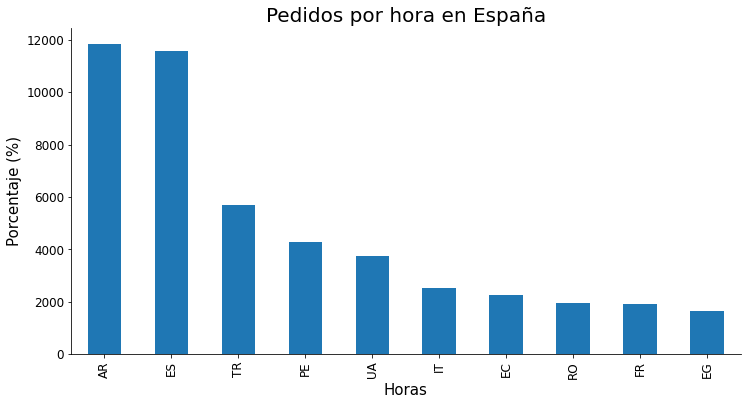

In [ ]:

fig, ax = plt.subplots(figsize=(12,6))
df['country_code'].value_counts(sort=True).nlargest(10).plot.bar()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("Pedidos por hora en España",fontsize=20)
ax.set_ylabel("Porcentaje (%)",fontsize=15)
ax.set_xlabel("Horas",fontsize=15)
ax.tick_params(labelsize=12)

In [ ]:
#get a new dataframe only with the total deliveries
dfmap=df['country_code'].value_counts()
dfmap=pd.DataFrame(dfmap).reset_index()
dfmap.columns = ['country_code','total']

In [ ]:
# Find geolocation and country nami in Spanish
geolocator = Nominatim(user_agent="akadelivers1")
def longitude(n):
    rr=geolocator.geocode(n)
    lon=rr.longitude
    return lon
def latitude(m):
    ss=geolocator.geocode(m)
    lat=ss.latitude
    return lat
def name(nm):
    tt=geolocator.geocode(nm,  language='es')[0]
    return tt
dfmap['lon'] = dfmap['country_code'].apply(longitude)
dfmap['lat'] = dfmap['country_code'].apply(latitude)
dfmap['Country'] = dfmap['country_code'].apply(name)

In [ ]:
dfmap.head(3)

,country_code,total,lon,lat,Country
0,AR,11854,-64.967282,-34.996496,Argentina
1,ES,11554,-4.837979,39.326068,España
2,TR,5696,34.924965,38.959759,Turquía


In [ ]:
print('Los tres países con el mayor número de entregas son:')
print(' - ',str(dfmap['Country'][0])+ ' con un total de ' + str(dfmap['total'][0]) + ' entregas')
print(' - ',str(dfmap['Country'][1])+ ' con un total de ' + str(dfmap['total'][1]) + ' entregas')
print(' - ',str(dfmap['Country'][2])+ ' con un total de ' + str(dfmap['total'][2]) + ' entregas')

Los tres países con el mayor número de entregas son:
 -  Argentina con un total de 11854 entregas
 -  España con un total de 11554 entregas
 -  Turquía con un total de 5696 entregas


In [ ]:
import plotly.graph_objects as go

dfmap['text'] = dfmap['Country'] + '<br>Entregas: ' + (dfmap['total']).astype(str)
limits = [(0,3000)]
color=['red']
colors = ["royalblue","lightgrey","orange","orange","orange"]
scale = 4500

fig = go.Figure()

for i in range(len(limits)):
  lim = limits[i]
  df_sub = df[lim[0]:lim[1]]
  fig.add_trace(go.Scattergeo(
      locationmode = 'USA-states',
      lon = dfmap['lon'],
      lat = dfmap['lat'],
      text = dfmap['text'],
      marker = dict(
          size = dfmap['total']/scale*20,
          color = colors[2:5],
          opacity=0.6,
          line_color='rgb(255,255,255)',
          line_width=0.9,
          sizemode = 'diameter',
          sizeref=1),
      name = '{0} - {1}'.format(lim[0],lim[1])))

fig.update_layout(
        title_text = 'Akadeliveries entregas por país (En naranja los tres primeros en número de entregas)',
        showlegend = False,
        width=1100,
        geo = dict(
            scope = 'world',
            landcolor = 'rgb(255, 255, 255)',
            bgcolor = 'rgba(234, 234, 234, 1.0)',
            framewidth=0,
        )
    )

fig.show()



```
# This is formatted as code
```

### 2. ¿Cuáles son las horas en las que se realizan más pedidos en España?

In [ ]:
dfes=df[df['country_code'] != 'ES']

In [ ]:
# convert local_time hour format
dfes['local_time']=dfes['local_time'].str[:2].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


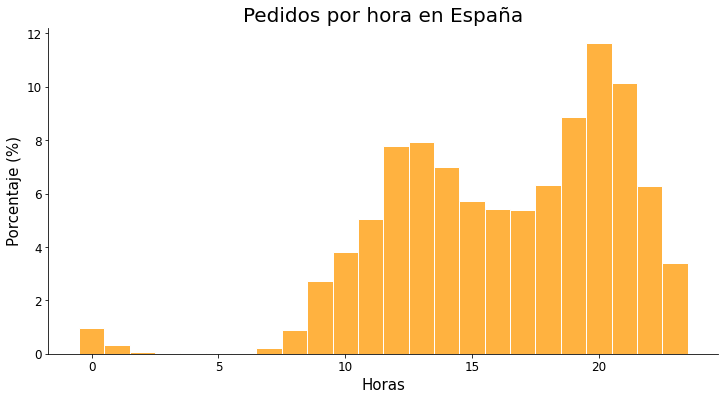

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(data=dfes, x="local_time", binwidth=1, stat="percent", discrete=True, color='#ff9900', edgecolor="w")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("Pedidos por hora en España",fontsize=20)
ax.set_ylabel("Porcentaje (%)",fontsize=15)
ax.set_xlabel("Horas",fontsize=15)
ax.tick_params(labelsize=12)

In [ ]:
es=pd.DataFrame(dfes['local_time'].value_counts()[0:3]).reset_index()

In [ ]:
print('Horas con mayor número de entregas en España:')
print(' - ',str(es['index'][0])+ 'h con un total de ' + str(es['local_time'][0]) + ' entregas')
print(' - ',str(es['index'][1])+ 'h con un total de ' + str(es['local_time'][1]) + ' entregas')
print(' - ',str(es['index'][2])+ 'h con un total de ' + str(es['local_time'][2]) + ' entregas')

Horas con mayor número de entregas en España:
 -  20h con un total de 4976 entregas
 -  21h con un total de 4339 entregas
 -  19h con un total de 3790 entregas


### 3. ¿Cuál es el precio medio por pedido en la tienda con ID 12513?

In [ ]:
dfid=(df[df['store_address'] == 12513.0]).mean()
rnd=round(dfid['products_total'],2)
print('Precio medio de la tienda ID 12513 es:', rnd)

Precio medio de la tienda ID 12513 es: 17.39


### 4. Qué porcentaje de repartidores pondrías por cada turno para que sean capaces de hacer frente a los picos de demanda.

Teniendo en cuenta los picos de demanda en España, si los repartidores trabajan en turnos de 8horas.<br>

Turno 1 (00:00-08:00)<br>
Turno 2 (08:00-16:00)<br>
Turno 3 (16:00-00:00)


In [ ]:
df1 = dfes[(dfes['local_time'] >= 0) & (dfes['local_time'] < 8)]
df2 = dfes[(dfes['local_time'] >= 8) & (dfes['local_time'] < 16)]
df3 = dfes[(dfes['local_time'] >= 16)]

In [ ]:
total=df1['local_time'].value_counts().max() + df2['local_time'].value_counts().max() + df3['local_time'].value_counts().max()

In [ ]:
round((df1['local_time'].value_counts().max()/total)*100 , 2)

4.74

In [ ]:
print('Porcentaje de trabajadores:')
print('Turno 1 (00:00-08:00):',round((df1['local_time'].value_counts().max()/total)*100 , 2),'%')
print('Turno 2 (08:00-16:00):',round((df2['local_time'].value_counts().max()/total)*100 , 2),'%')
print('Turno 3 (16:00-00:00):',round((df3['local_time'].value_counts().max()/total)*100 , 2),'%')
print('\nEl porcentaje se basa en el número de perdidos durante el pico de cara período,\nno en el total de pedidos durante el período')

Porcentaje de trabajadores:
Turno 1 (00:00-08:00): 4.74 %
Turno 2 (08:00-16:00): 38.65 %
Turno 3 (16:00-00:00): 56.6 %

El porcentaje se basa en el número de perdidos durante el pico de cara período,
no en el total de pedidos durante el período
